# Simple Example
To illustrate how to use GluonTS, we train a DeepAR-model and make predictions using the airpassengers dataset. The dataset consists of a single time series of monthly passenger numbers between 1949 and 1960. We train the model on the first nine years and make predictions for the remaining three years.


In [27]:

import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

# Load data from a CSV file into a PandasDataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/"
    "TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv",
    index_col=0,
    parse_dates=True,
)
dataset = PandasDataset(df, target="#Passengers")

# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-36)
#split?
print(f"training_data: {(training_data)}")
training_data_iterable=iter(training_data)
print(next(training_data_iterable))
#print(next(training_data_iterable))
test_data = test_gen.generate_instances(prediction_length=12, windows=3)
print(f"test_data: {test_data}")


training_data: TrainingDataset(dataset=PandasDataset<size=1, freq=M, num_feat_dynamic_real=0, num_past_feat_dynamic_real=0, num_feat_static_real=0, num_feat_static_cat=0, static_cardinalities=[]>, splitter=OffsetSplitter(offset=-36))
{'start': Period('1949-01', 'M'), 'target': array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336])}
test_data: TestData(dataset=PandasDataset<size=1, freq=M, num_feat_dynamic_real=0, num_past_feat_dynamic_real=0, num_

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/anaconda3/envs/py_310/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | In sizes                                                   | Out sizes   
------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 23.3 K | [[1, 1], [1, 1], [1, 48, 2], [1, 48], [1, 48], [1, 12, 2]] | [1, 100, 12]
------------------------------------------------------------------------------------------------------------------
23.3 K    Trainable params
0         Non-trainable params
23.3 K    Total params
0.093     Total estimated model params size (MB)


Training: |                                                                                                   …

Epoch 0, global step 50: 'train_loss' reached 5.96791 (best 5.96791), saving model to '/Users/partsi/Sync/gluonts/lightning_logs/version_6/checkpoints/epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 4.80237 (best 4.80237), saving model to '/Users/partsi/Sync/gluonts/lightning_logs/version_6/checkpoints/epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 4.50555 (best 4.50555), saving model to '/Users/partsi/Sync/gluonts/lightning_logs/version_6/checkpoints/epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 4.35152 (best 4.35152), saving model to '/Users/partsi/Sync/gluonts/lightning_logs/version_6/checkpoints/epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached 4.21501 (best 4.21501), saving model to '/Users/partsi/Sync/gluonts/lightning_logs/version_6/checkpoints/epoch=4-step=250.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=5` reached.


gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=array([[335.22543, 316.14346, 386.05896, ..., 374.19397, 244.90427,
        414.7412 ],
       [365.79102, 352.8465 , 367.27652, ..., 400.92117, 364.7245 ,
        266.6431 ],
       [319.48398, 327.2331 , 375.458  , ..., 429.84256, 378.80557,
        308.7085 ],
       ...,
       [339.95065, 325.37076, 397.062  , ..., 412.90063, 265.223  ,
        350.76495],
       [315.59695, 304.8117 , 377.8169 , ..., 339.59055, 352.83563,
        359.28256],
       [383.63608, 346.52924, 346.83206, ..., 378.9448 , 420.34665,
        266.38626]], dtype=float32), start_date=Period('1958-01', 'M'))
gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=array([[341.747  , 310.13596, 372.97574, ..., 364.33313, 379.2704 ,
        382.69757],
       [300.73224, 324.05954, 392.3157 , ..., 368.71393, 360.60284,
        385.348  ],
       [363.9837 , 319.65665, 342.29514, ..., 417.44455, 363.61847,
        345.91272],
  

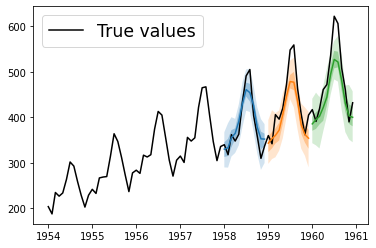

In [28]:
# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12, freq="M", trainer_kwargs={"max_epochs": 5}
).train(training_data)

forecasts = list(model.predict(test_data.input))

# Plot predictions
plt.plot(df["1954":], color="black")
fc_count = 0
for forecast in forecasts:
    print(forecast)
    fc_count += 1
    forecast.plot()
print(f"fc_count:{fc_count}")
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()

100
fc_count:1


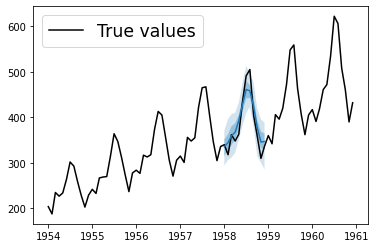

In [26]:
# Plot predictions
# forecasts contain the number of windows
plt.figure()
plt.plot(df["1954":], color="black")
fc_count = 0
for forecast in forecasts:
    print(len(forecast.samples))
    fc_count += 1
    forecast.plot()
    if fc_count > 0:
        break
print(f"fc_count:{fc_count}")
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()